<a href="https://colab.research.google.com/github/Nirvanall/IPilProject2020/blob/master/chan_vase_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chan-Vase segmentation in skimage
* example link: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_chan_vese.html

* source code: https://github.com/scikit-image/scikit-image/blob/master/skimage/segmentation/_chan_vese.py

* Chan-Vase paper: https://link.springer.com/chapter/10.1007%2F3-540-48236-9_13

* Chan-Vase segmentation intro and experiment: http://www.ipol.im/pub/art/2012/g-cv/article.pdf
 


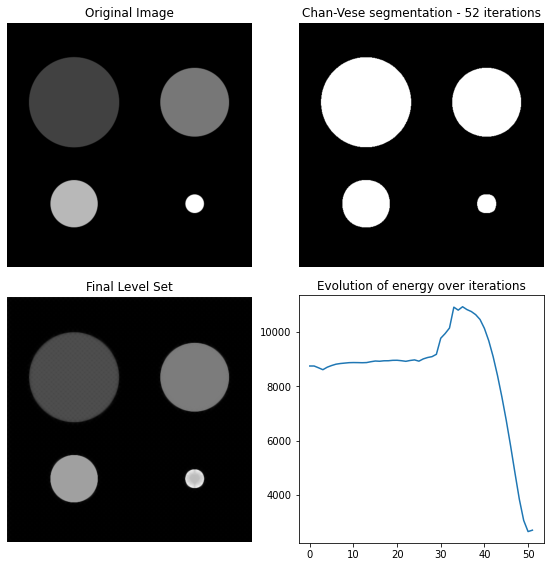

In [0]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
from skimage import color, io
import numpy as np

img = io.imread('intensity_circle.png')
img = color.rgb2gray(img)
img = img - np.mean(img)
#image = img_as_float(data.camera())
image = img
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()